In [1]:
import numpy as np

import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [3]:
# 读取文件原始数据
data = []
labels = []

with open("../synthetic/logs/mu_sigma_pure_mlp.csv", encoding='UTF-8') as fileObject:
    for line in fileObject:
        line_split = line.split(',')
        # features = [line_split[0], line_split[1], line_split[2], line_split[3], line_split[4], line_split[6], line_split[7], line_split[8]]
        data.append(line_split[:-2])
        labels.append([line_split[-2], line_split[-1]])
        # run_labels.append(line_split[-1])

X = []
for row in data:
    row = [float(x) for x in row]
    X.append(row)

y = np.array([[float(x[0]), float(x[1])] for x in labels])


# train cost model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)

# print(type(y_train))

In [4]:
compile_model = xgb.XGBRegressor(n_estimators=100, 
                         learning_rate=0.05, 
                         max_depth=10, 
                         objective='reg:squarederror')
compile_model.fit(X_train, y_train[:, 0])


# 对测试集进行预测
compile_ans = compile_model.predict(X_test)

print(mean_squared_error(y_test[:, 0], compile_ans))

35.05325360374401


In [5]:
run_model = xgb.XGBRegressor(n_estimators=100, 
                         learning_rate=0.05, 
                         max_depth=10, 
                         objective='reg:squarederror')
run_model.fit(X_train, y_train[:, 1])

run_ans = run_model.predict(X_test)
print(mean_squared_error(y_test[:, 1], run_ans))

0.07743800830249063


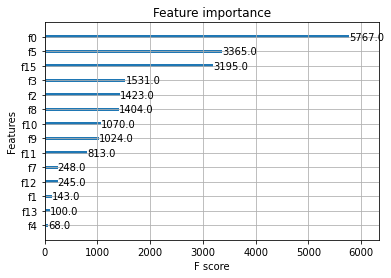

In [6]:
#  显示重要特征
plot_importance(compile_model)
plt.show()

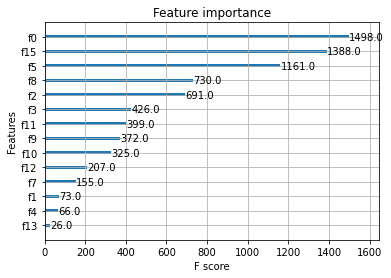

In [7]:
#  显示重要特征
plot_importance(run_model)
plt.show()

In [8]:
compile_model.save_model("./ckpt/compile2.txt")
run_model.save_model("./ckpt/run2.txt")

In [11]:
compile_model_loaded = xgb.Booster()
compile_model_loaded.load_model("./ckpt/compile2.txt")

In [16]:
compile_model_loaded.predict(xgb.DMatrix([[27026.0,9058.0,8986.0,8018.0,5399.0,0.19977059128246874,0.001121,16,8, 0, 0, 0, 4, 128,50,10]]))

array([8.568052], dtype=float32)